In [1]:
# !pip install --quiet mediapy
# !pip install robosuite==1.4

In [2]:
from libero.libero import benchmark
from libero.libero.envs import OffScreenRenderEnv
from libero.libero import get_libero_path
import os 
import mediapy

[robosuite WARNING] No private macro file found! (__init__.py:7)
[robosuite WARNING] It is recommended to use a private macro file (__init__.py:8)
[robosuite WARNING] To setup, run: python /home/khw/anaconda3/envs/openvla2/lib/python3.10/site-packages/robosuite/scripts/setup_macros.py (__init__.py:9)


In [6]:
def libero_frames(task_suite_name, task_id, resize):

    benchmark_dict = benchmark.get_benchmark_dict()
    task_suite = benchmark_dict[task_suite_name]()

    # retrieve a specific task
    task = task_suite.get_task(task_id)
    task_name = task.name
    task_description = task.language
    task_bddl_file = os.path.join(get_libero_path("bddl_files"), task.problem_folder, task.bddl_file)
    print(f"[info] retrieving task {task_id} from suite {task_suite_name}, the " + \
        f"language instruction is {task_description}, and the bddl file is {task_bddl_file}")

    # step over the environment
    env_args = {
        "bddl_file_name": task_bddl_file,
        "camera_heights": resize,
        "camera_widths": resize
    }
    env = OffScreenRenderEnv(**env_args)
    env.seed(0)
    env.reset()
    init_states = task_suite.get_task_init_states(task_id) # for benchmarking purpose, we fix the a set of initial states
    env.set_init_state(init_states[0])

    dummy_action = [0.] * 7
    replay_images = []

    if task_suite_name == "libero_spatial":
        max_steps = 220  # longest training demo has 193 steps
    elif task_suite_name == "libero_object":
        max_steps = 280  # longest training demo has 254 steps
    elif task_suite_name == "libero_goal":
        max_steps = 300  # longest training demo has 270 steps
    elif task_suite_name == "libero_10":
        max_steps = 520  # longest training demo has 505 steps
    elif task_suite_name == "libero_90":
        max_steps = 400  # longest training demo has 373 steps

    for step in range(max_steps):
        obs, reward, done, info = env.step(dummy_action)
        img = obs["agentview_image"]
        img = img[::-1, ::-1] 
        replay_images.append(img)
    env.close()
    
    return replay_images

In [7]:
# ["libero_spatial", "libero_object", "libero_goal", "libero_10"]
task_suite_name = "libero_10" # can also choose libero_spatial, libero_object, etc.
task_id = 0
resize = 512


replay_images = libero_frames(task_suite_name, task_id, resize)

[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[Warning]: datasets path /home/khw/VLA/LIBERO/LIBERO/libero/libero/../datasets does not exist!
[info] retrieving task 0 from suite libero_10, the language instruction is put both the alphabet soup and the tomato sauce in the basket, and the bddl file is /home/khw/VLA/LIBERO/LIBERO/libero/libero/./bddl_files/libero_10/LIVING_ROOM_SCENE2_put_both_the_alphabet_soup_and_the_tomato_sauce_in_the_basket.bddl
[Warning]: datasets path /home/khw/VLA/LIBERO/LIBERO/libero/libero/../datasets does not exist!


""

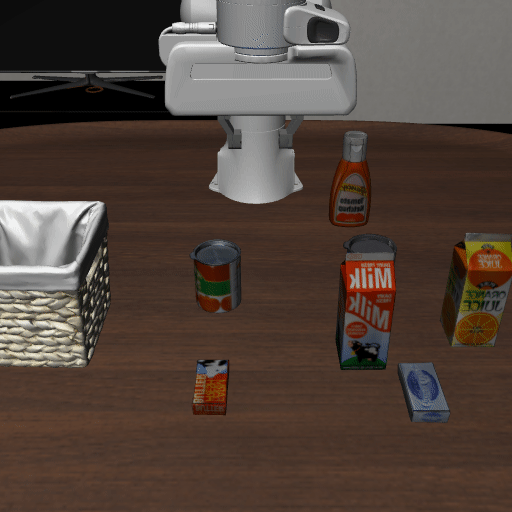

In [8]:
# images = [img for img in replay_images]
# mediapy.show_video(replay_images, fps=5)
mediapy.show_video(replay_images, fps=10, codec='gif')

[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[Warning]: datasets path /home/khw/VLA/LIBERO/LIBERO/libero/libero/../datasets does not exist!
[info] retrieving task 1 from suite libero_spatial, the language instruction is pick up the black bowl next to the ramekin and place it on the plate, and the bddl file is /home/khw/VLA/LIBERO/LIBERO/libero/libero/./bddl_files/libero_spatial/pick_up_the_black_bowl_next_to_the_ramekin_and_place_it_on_the_plate.bddl
[Warning]: datasets path /home/khw/VLA/LIBERO/LIBERO/libero/libero/../datasets does not exist!


""

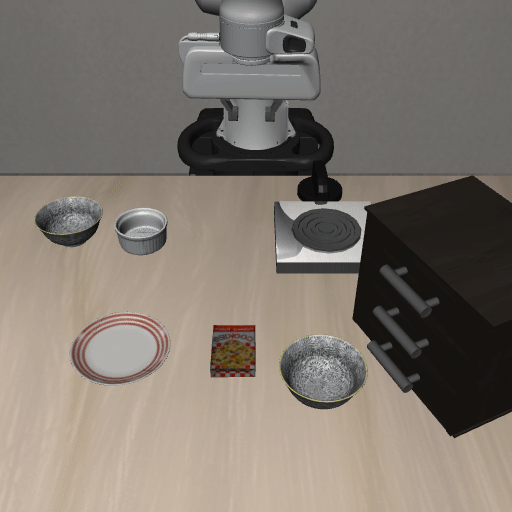

In [11]:
# ["libero_spatial", "libero_object", "libero_goal", "libero_10"]
task_suite_name = "libero_spatial" # can also choose libero_spatial, libero_object, etc.
task_id = 1
resize = 512


replay_images = libero_frames(task_suite_name, task_id, resize)

mediapy.show_video(replay_images, fps=10, codec='gif')